<a href="https://colab.research.google.com/github/GKS07/Computer_Vision/blob/main/Car_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Detection with YOLO

In [ ]:
# installing the roboflow

! pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import tensorflow as tf
from ultralytics import YOLO

In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
# downloading the data.

from roboflow import Roboflow
rf = Roboflow(api_key="cSDj9NHEAVrsdpIm71td")
project = rf.workspace("image-processing-i4wfe").project("car_detection-hytgp")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to car_detection-3 in yolov8:: 100%|██████████| 8128/8128 [01:03<00:00, 127.87it/s]


In [ ]:
def display_vehicle(image):
  subplot = 231
  plt.figure(figsize = (12,8))
  for j in range(len(image)):
    disp_img(image[j], 231 + j)

  plt.tight_layout()
  plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
  plt.show()



def disp_img(image, subplot):
  plt.subplot(subplot)
  plt.axis('off')
  plt.imshow(image)

In [ ]:
# displaying some images

img_path = '/content/car_detection-3/train/images'

def images_of_vehicles(img_path):
  images =[]
  for i in os.listdir(img_path)[10:16]:
    img_file = os.path.join(img_path,i)
    images.append(cv.imread(img_file))

  return  images

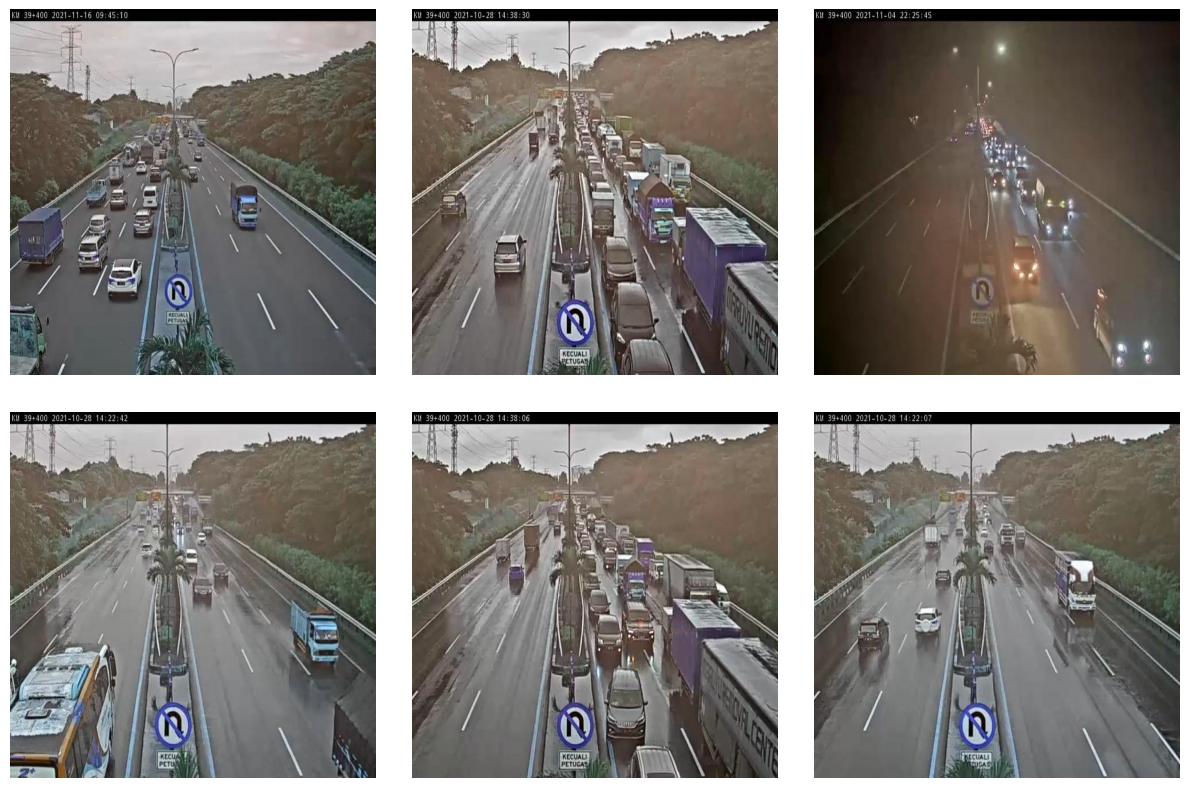

In [ ]:
img_array = images_of_vehicles(img_path)
display_vehicle(img_array)

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
os.chdir('/content/drive/MyDrive')

# Training the model

In [ ]:
model = YOLO('yolov8m.pt')

In [ ]:
# Training the model

with tf.device('/device:GPU:0'):

  !yolo task = detect mode = train model = yolov8m.pt data = '/content/drive/MyDrive/car_detection-3/data.yaml' epochs = 15 imgsz = 400 plots = True

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/car_detection-3/data.yaml, epochs=15, time=None, patience=50, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [ ]:
# function for displaying results.
def display_results(img, title):
  plt.figure(figsize = (20,25))
  plt.imshow(cv.imread(img))
  plt.title(title)
  plt.show()


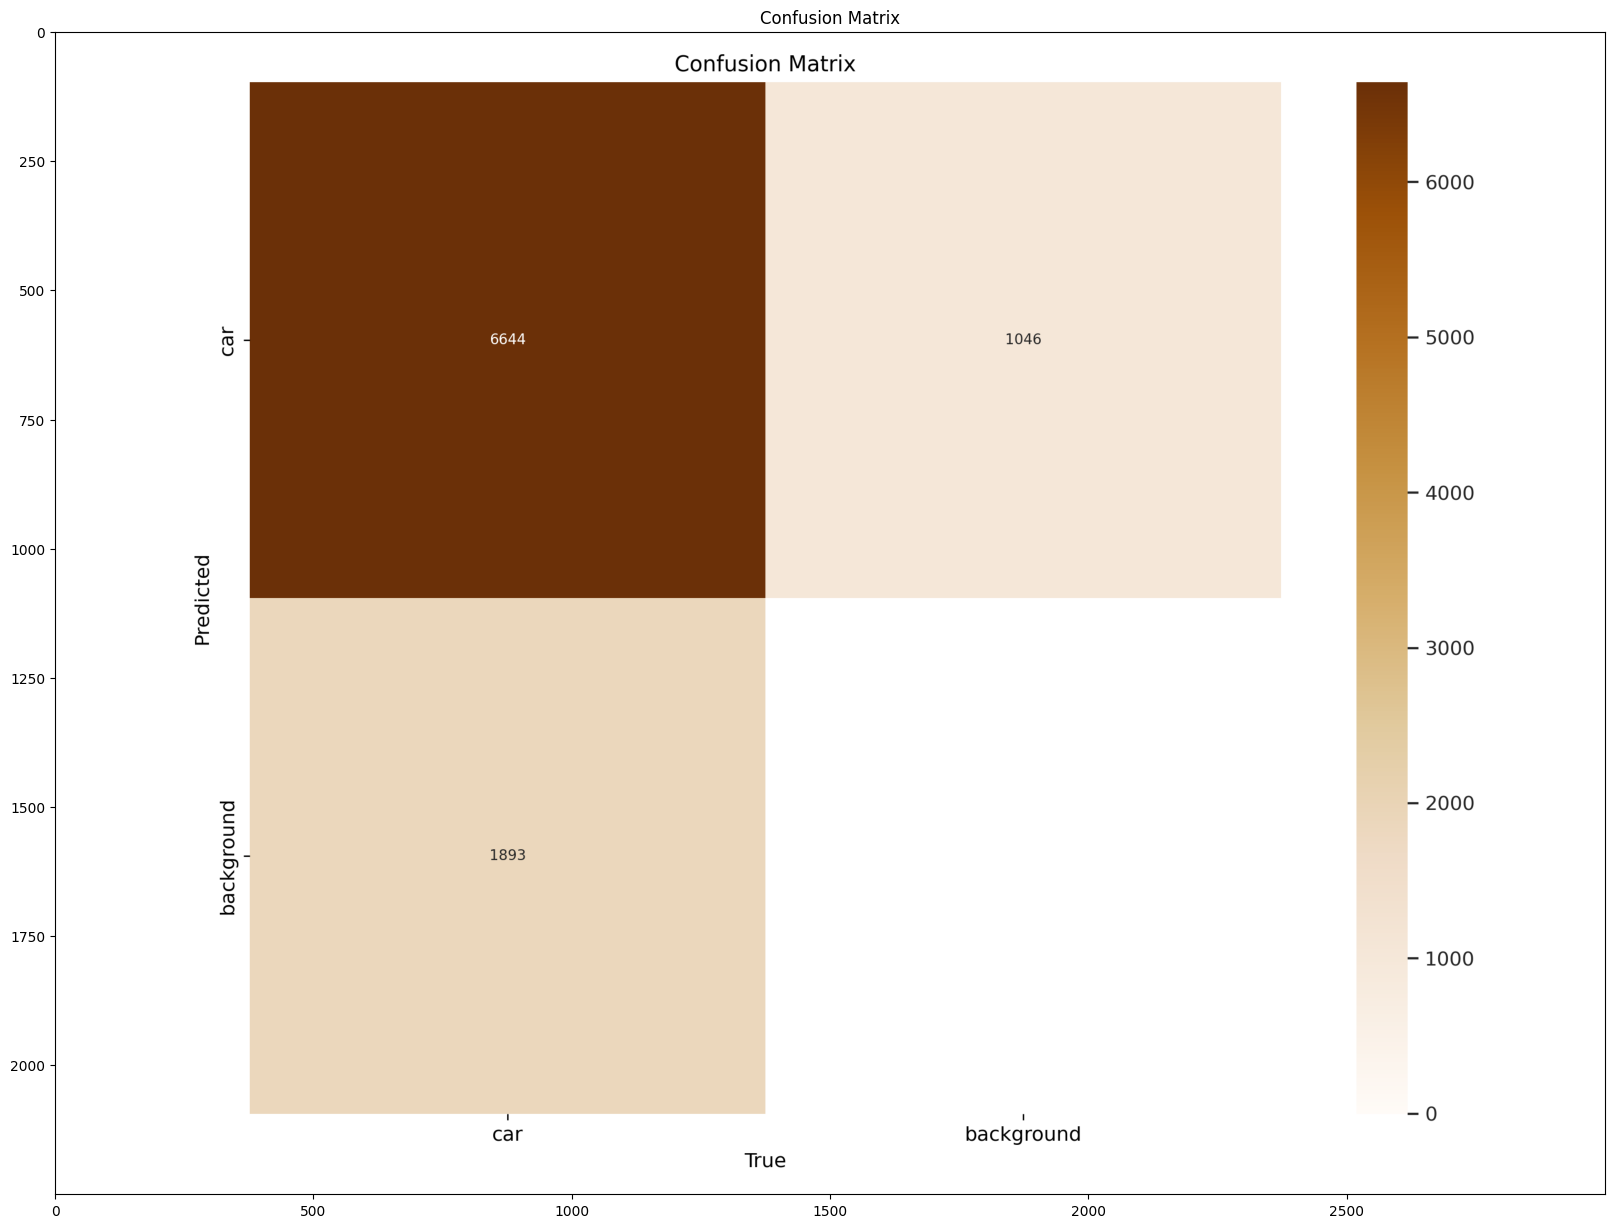

In [ ]:
display_results('/content/drive/MyDrive/runs/detect/train3/confusion_matrix.png', 'Confusion Matrix')

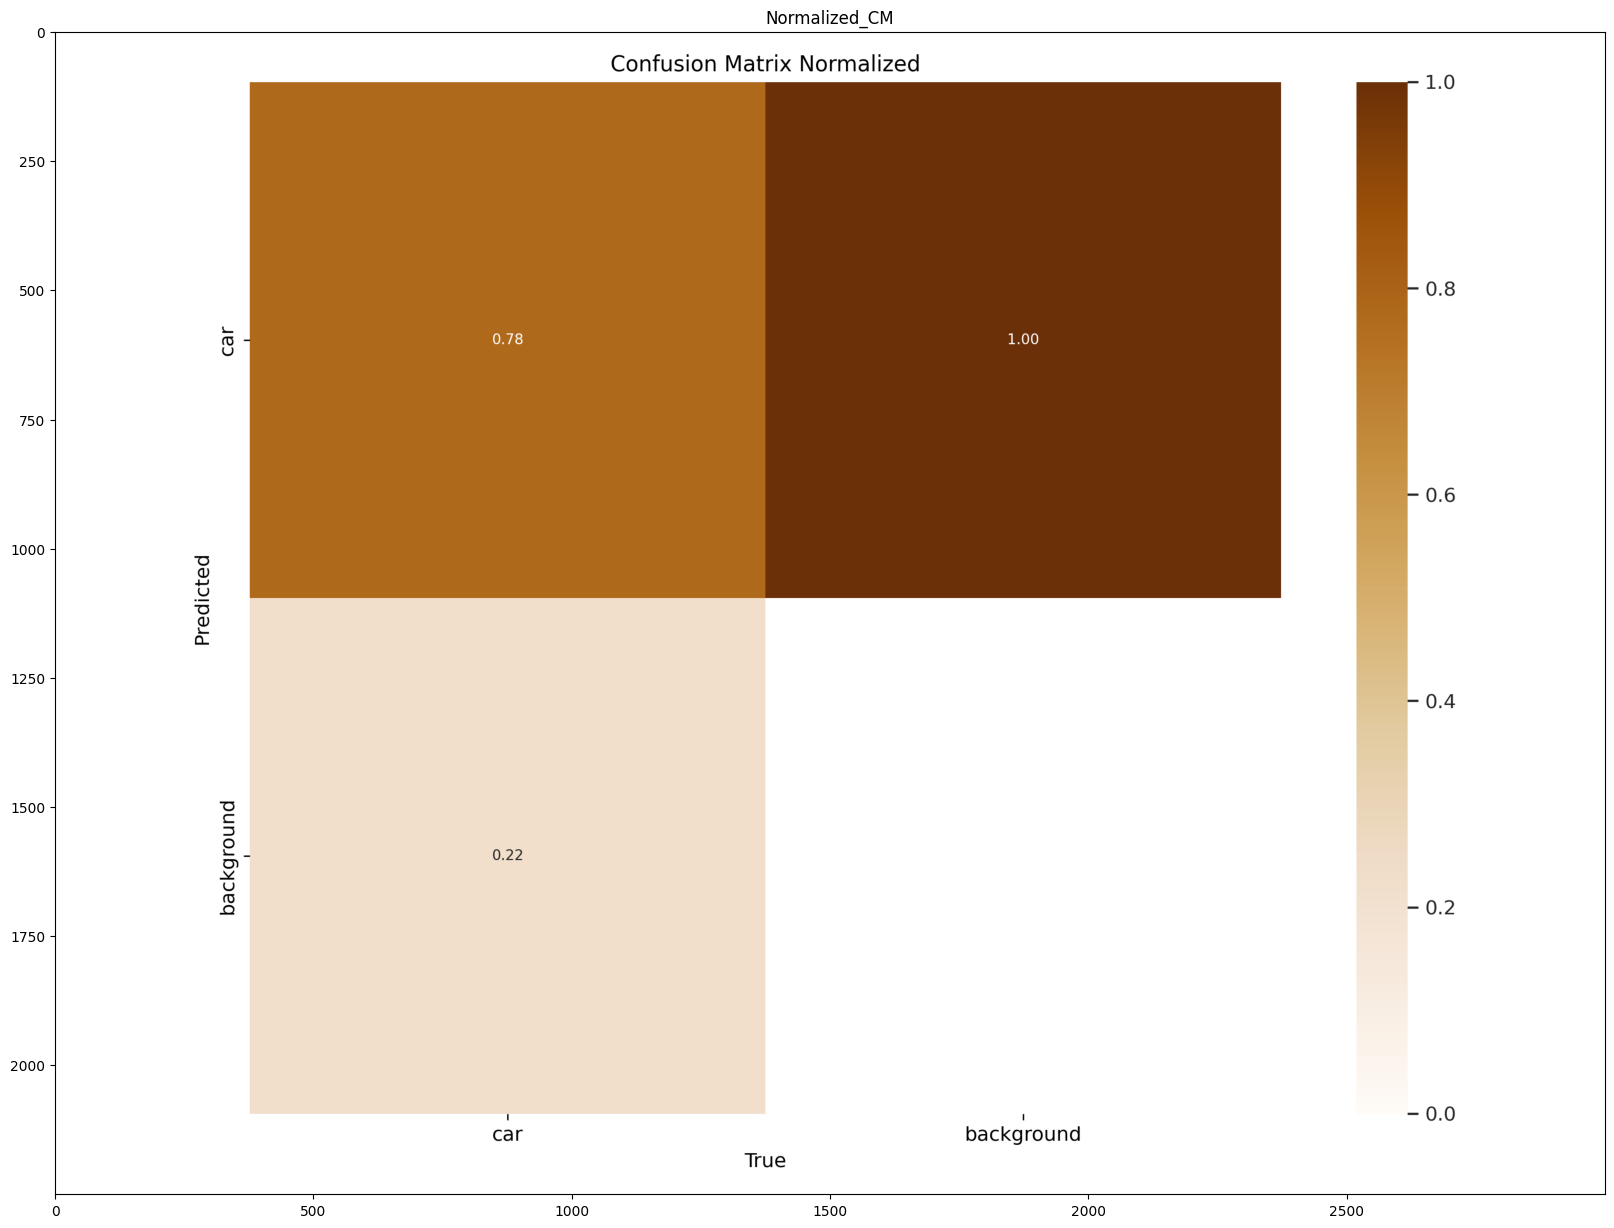

In [ ]:
display_results('/content/drive/MyDrive/runs/detect/train3/confusion_matrix_normalized.png', 'Normalized_CM')

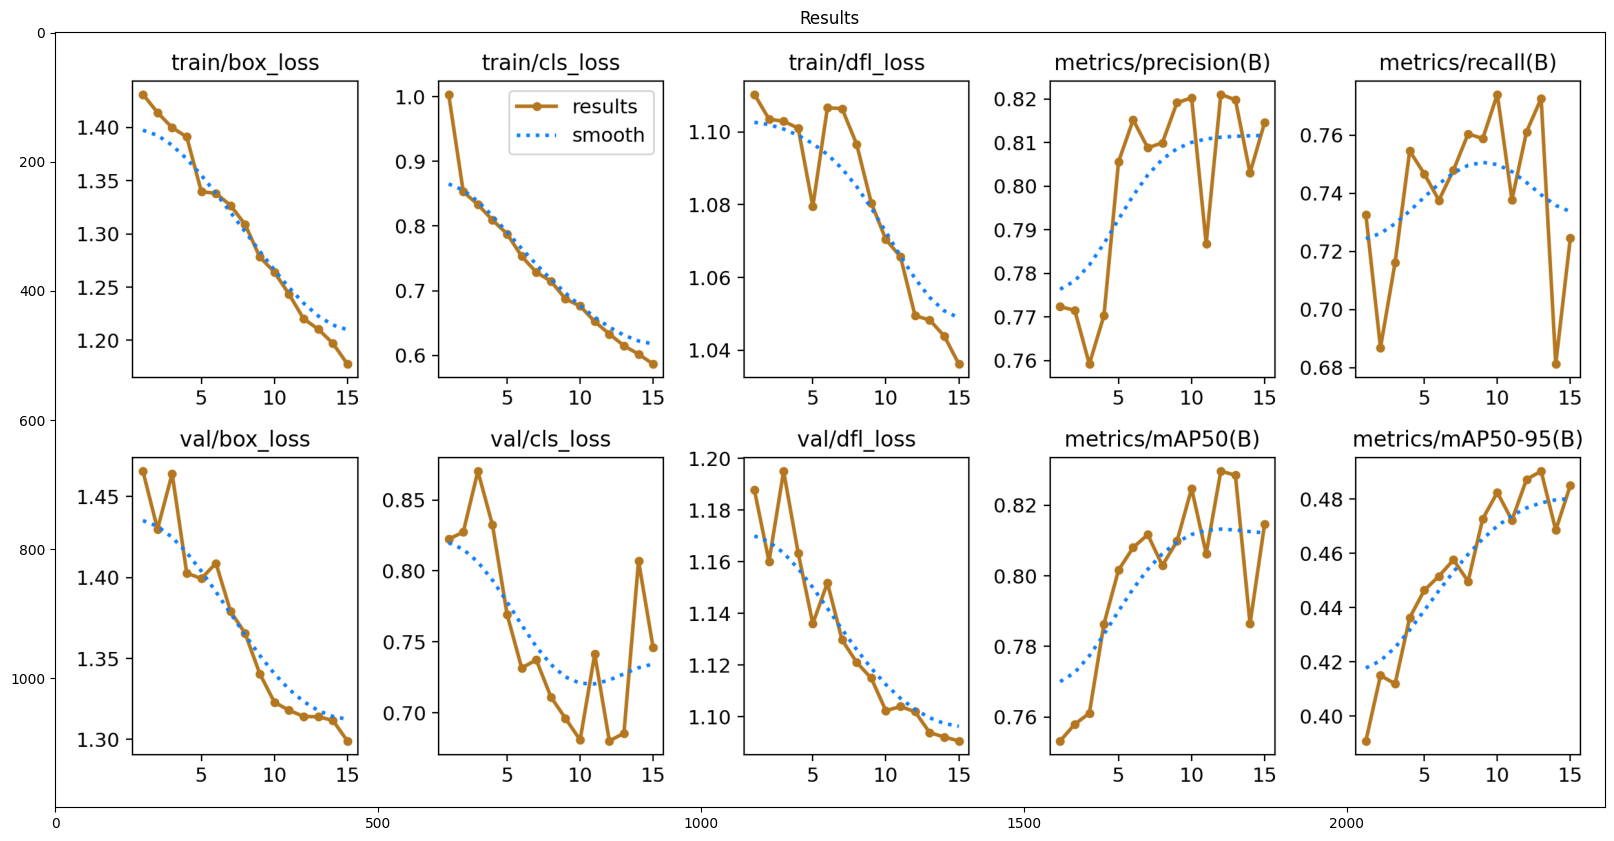

In [ ]:
display_results('/content/drive/MyDrive/runs/detect/train3/results.png', 'Results')

In [ ]:
display_results('/content/drive/MyDrive/runs/detect/train3/train_batch827.jpg', 'Train_Batch_827')

In [ ]:
display_results("/content/drive/MyDrive/runs/detect/train3/val_batch0_labels.jpg", 'Val_batch_0_labels')

In [ ]:
display_results('/content/drive/MyDrive/runs/detect/train3/val_batch0_pred.jpg', 'Val_batch_0_pred')

# Validating the model

In [ ]:
with tf.device('/device:GPU:0'):

  !yolo task = detect mode = val model = /content/drive/MyDrive/runs/detect/train3/weights/best.pt data = '/content/drive/MyDrive/car_detection-3/data.yaml'

Ultralytics YOLOv8.1.4 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 23.9MB/s]
val: Scanning /content/drive/MyDrive/car_detection-3/valid/labels.cache... 966 images, 39 backgrounds, 0 corrupt: 100% 966/966 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 61/61 [00:51<00:00,  1.19it/s]
                   all        966       8537       0.82      0.772      0.829      0.491
Speed: 0.4ms preprocess, 9.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


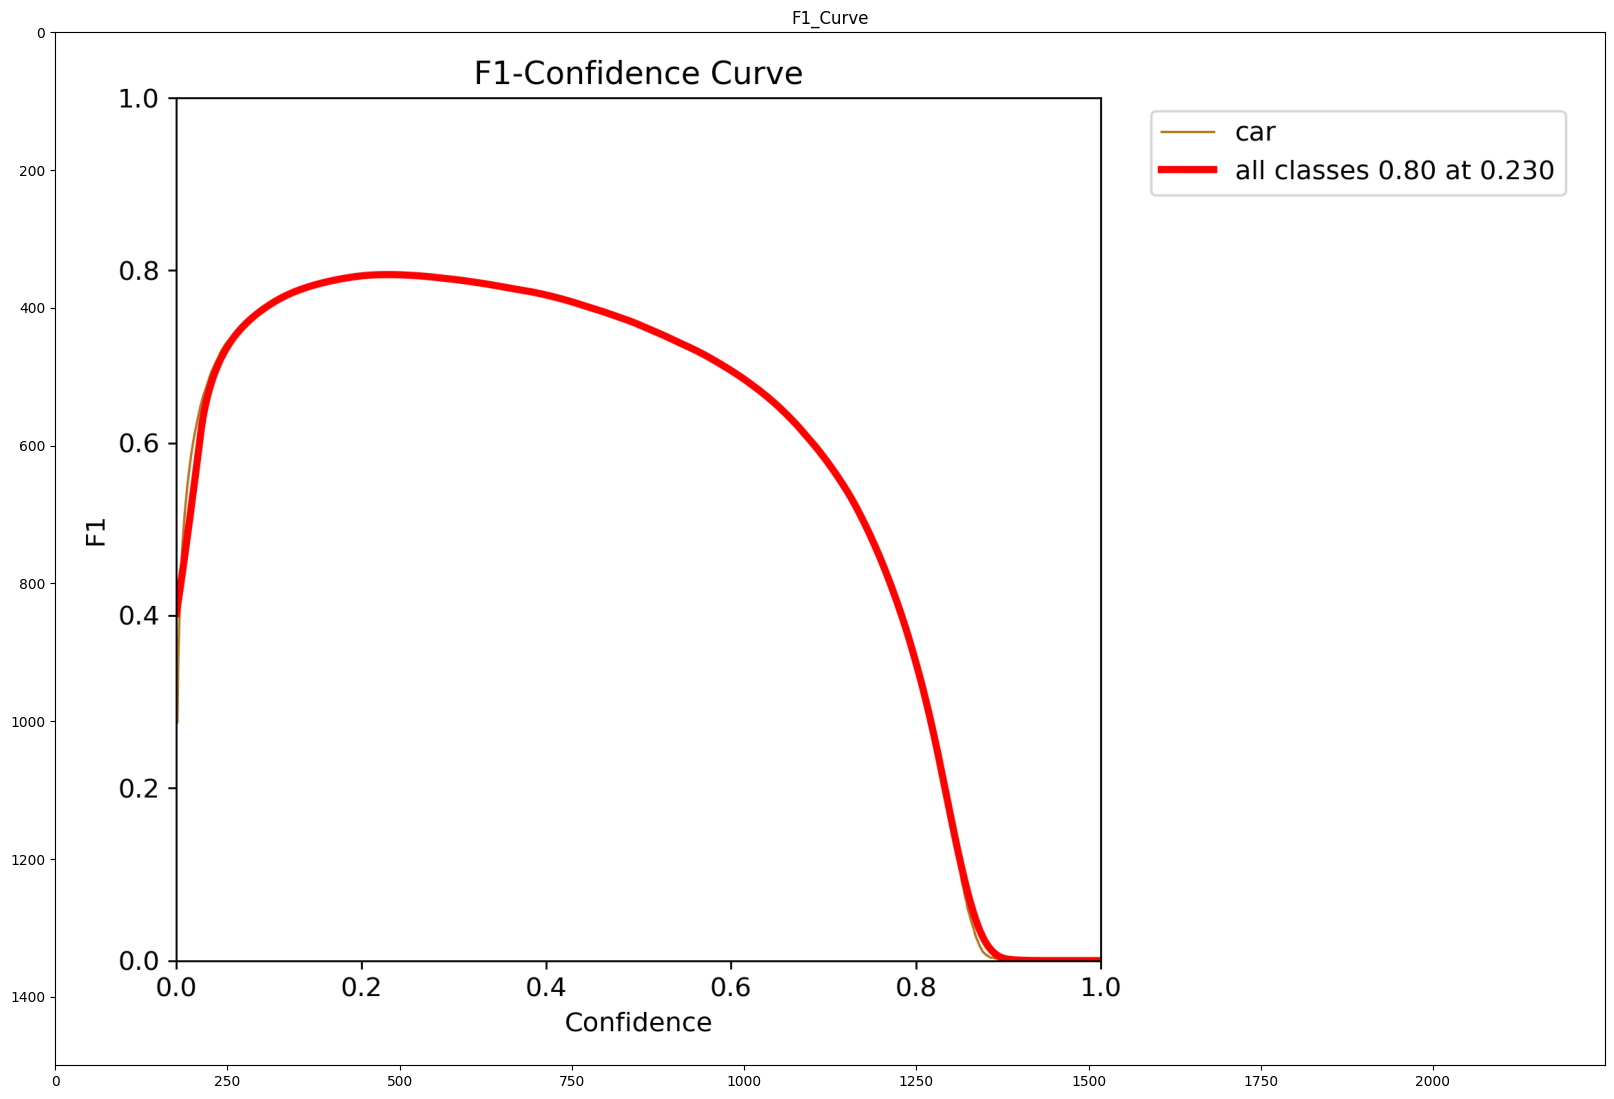

In [ ]:
display_results('/content/runs/detect/val/F1_curve.png', 'F1_Curve')

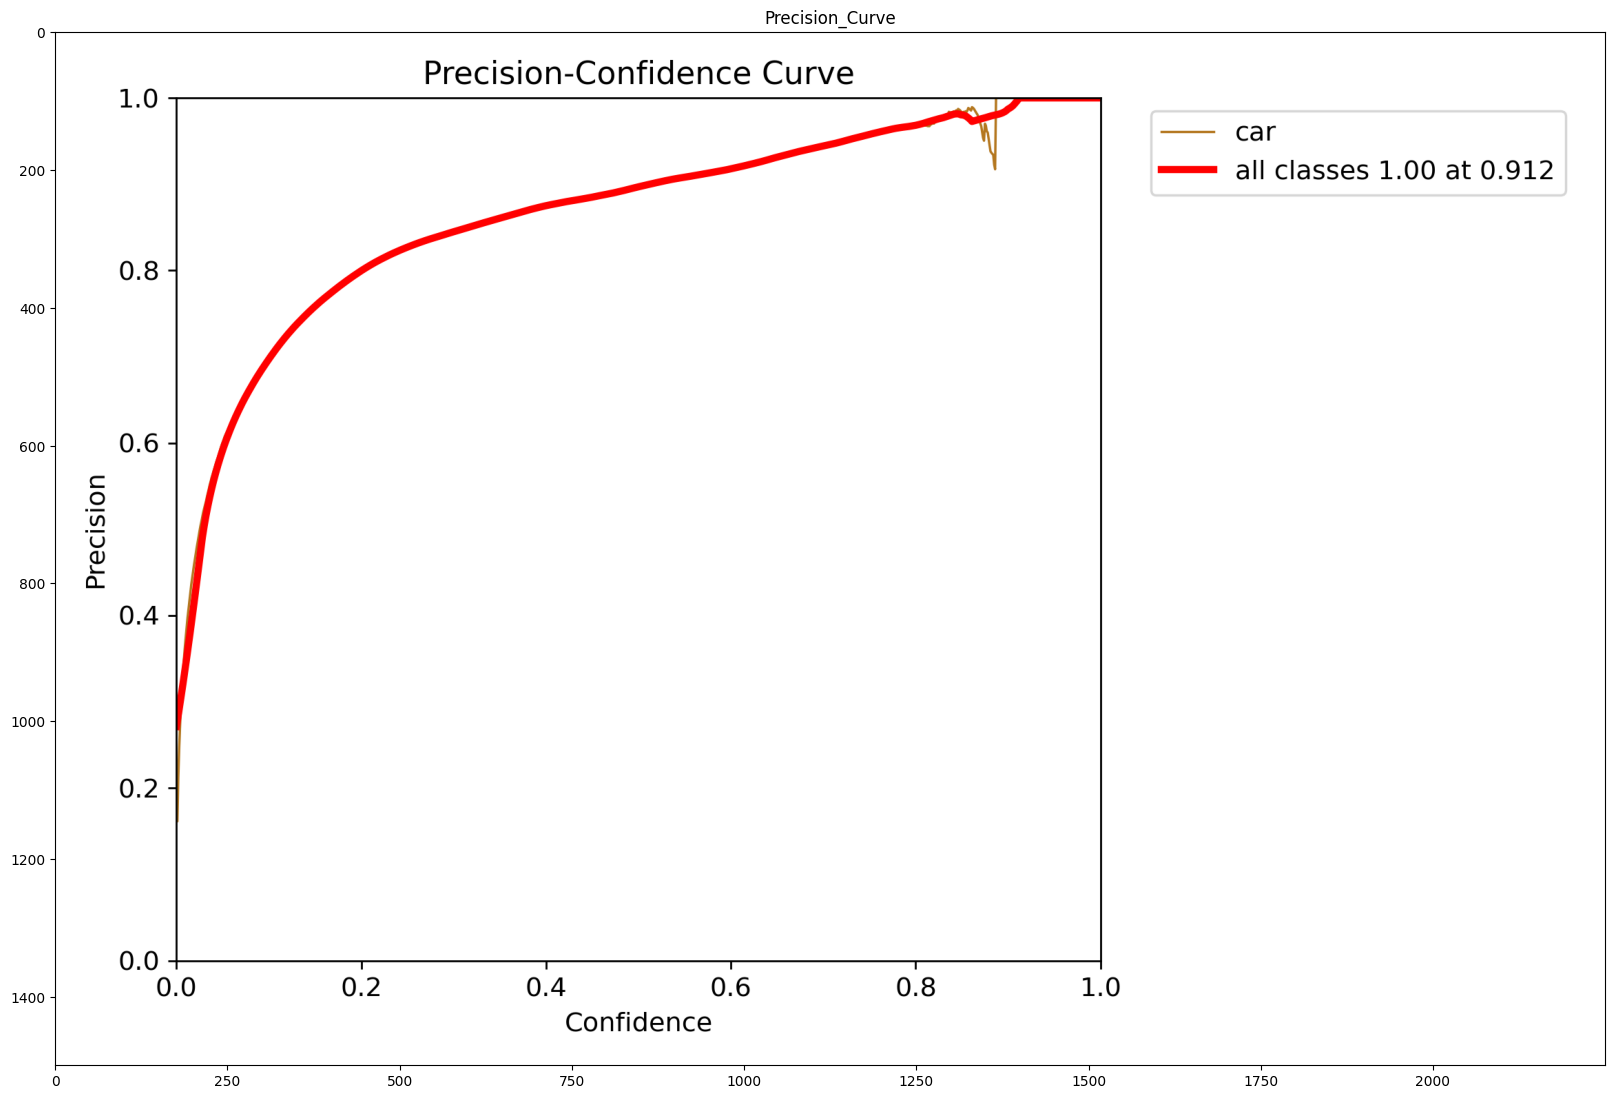

In [ ]:
display_results('/content/runs/detect/val/P_curve.png', 'Precision_Curve')

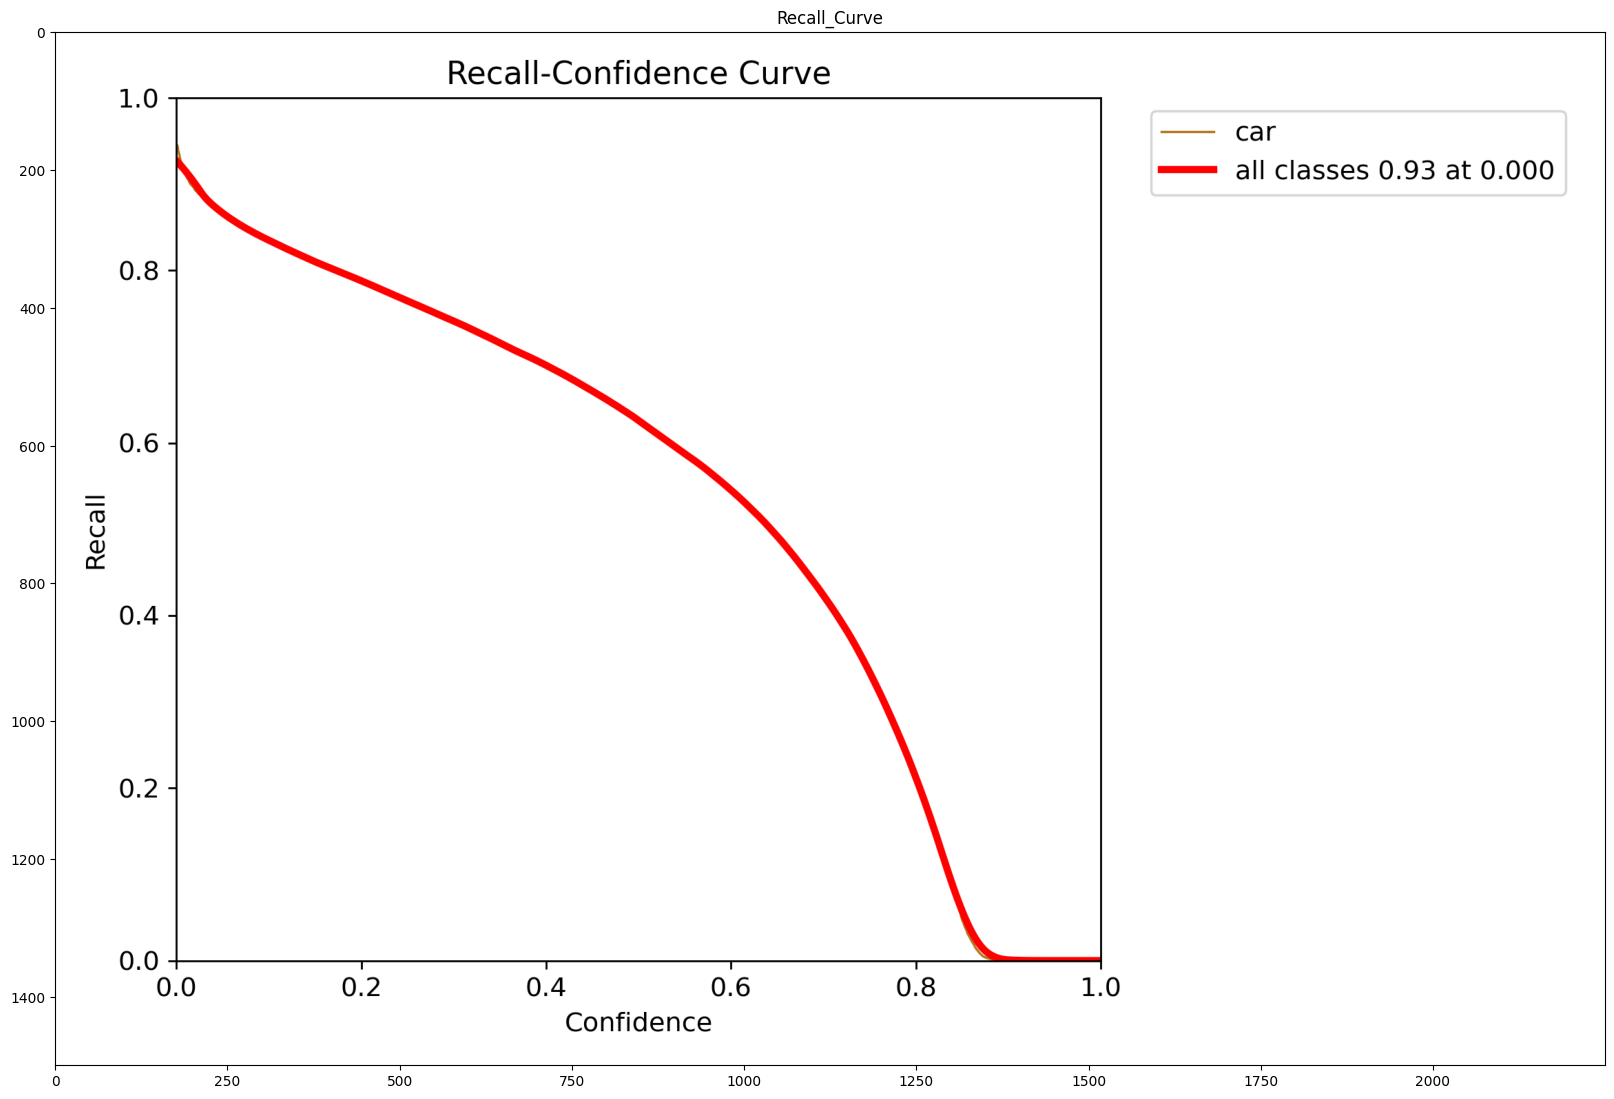

In [ ]:
display_results('/content/runs/detect/val/R_curve.png', 'Recall_Curve')

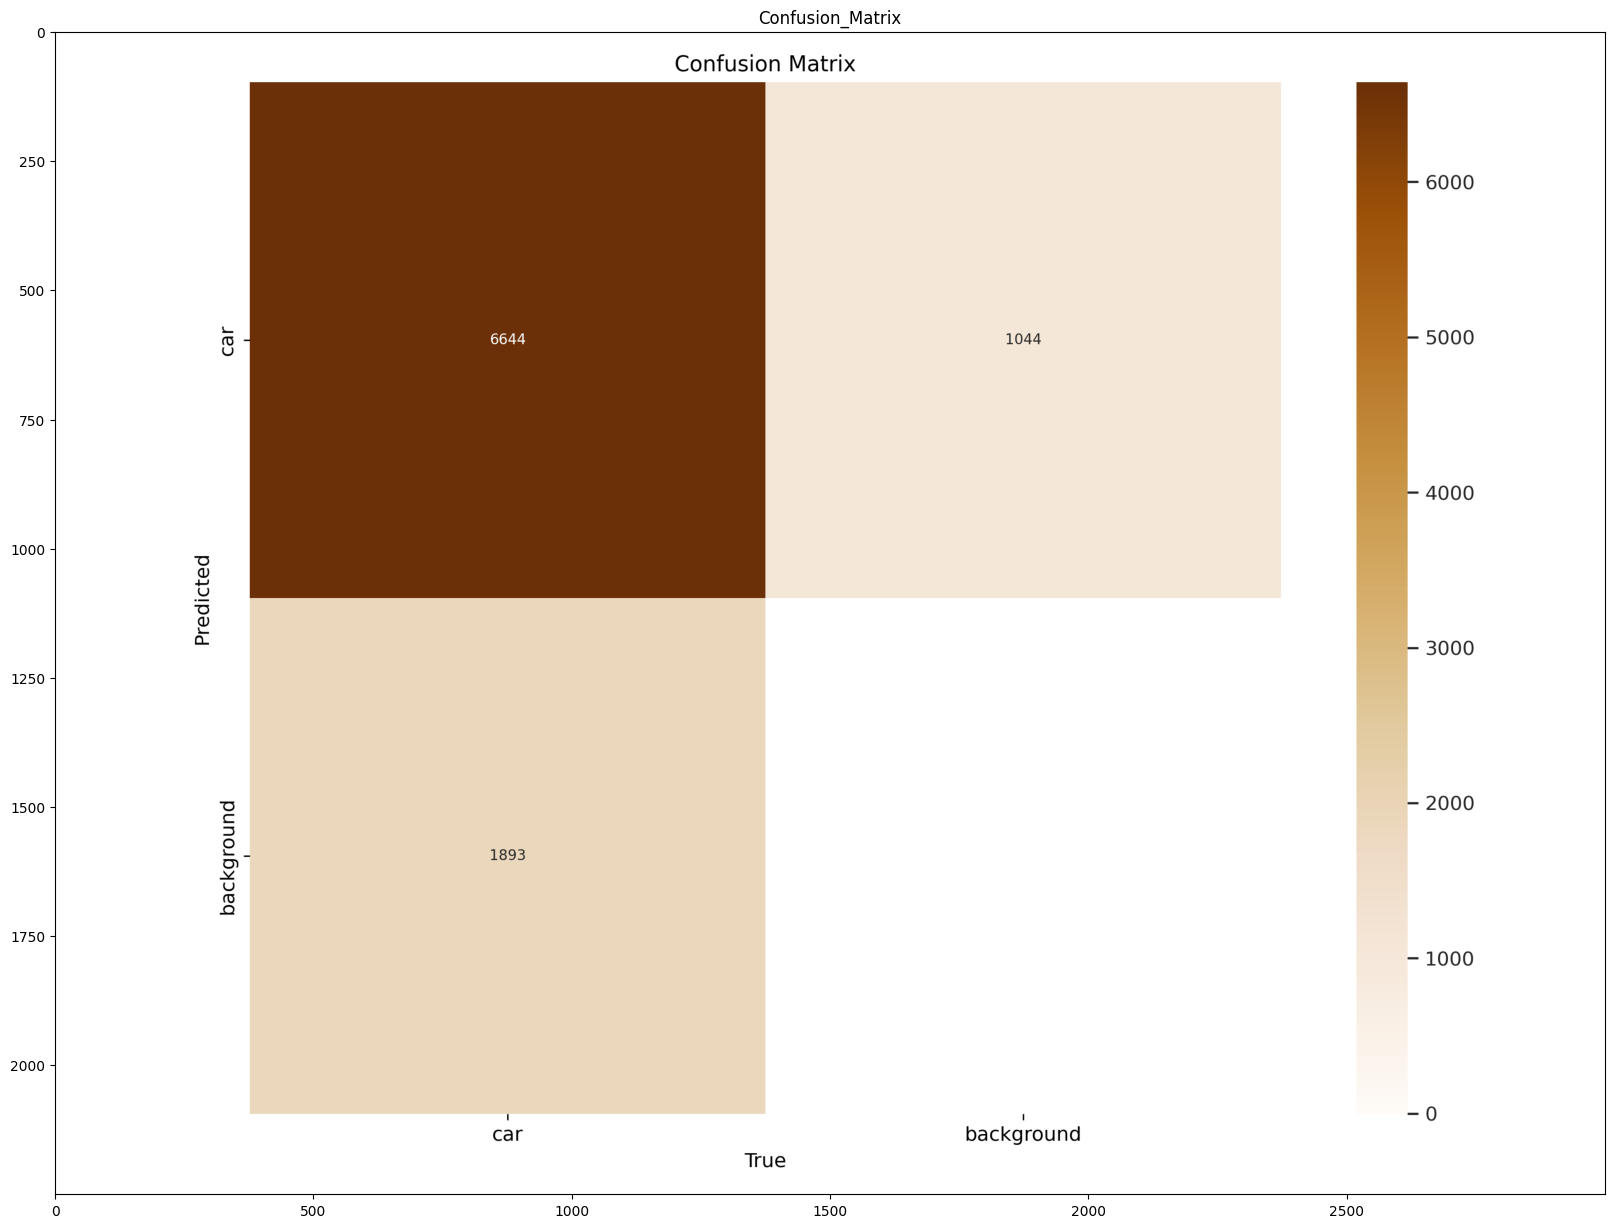

In [ ]:
display_results('/content/runs/detect/val/confusion_matrix.png', 'Confusion_Matrix')

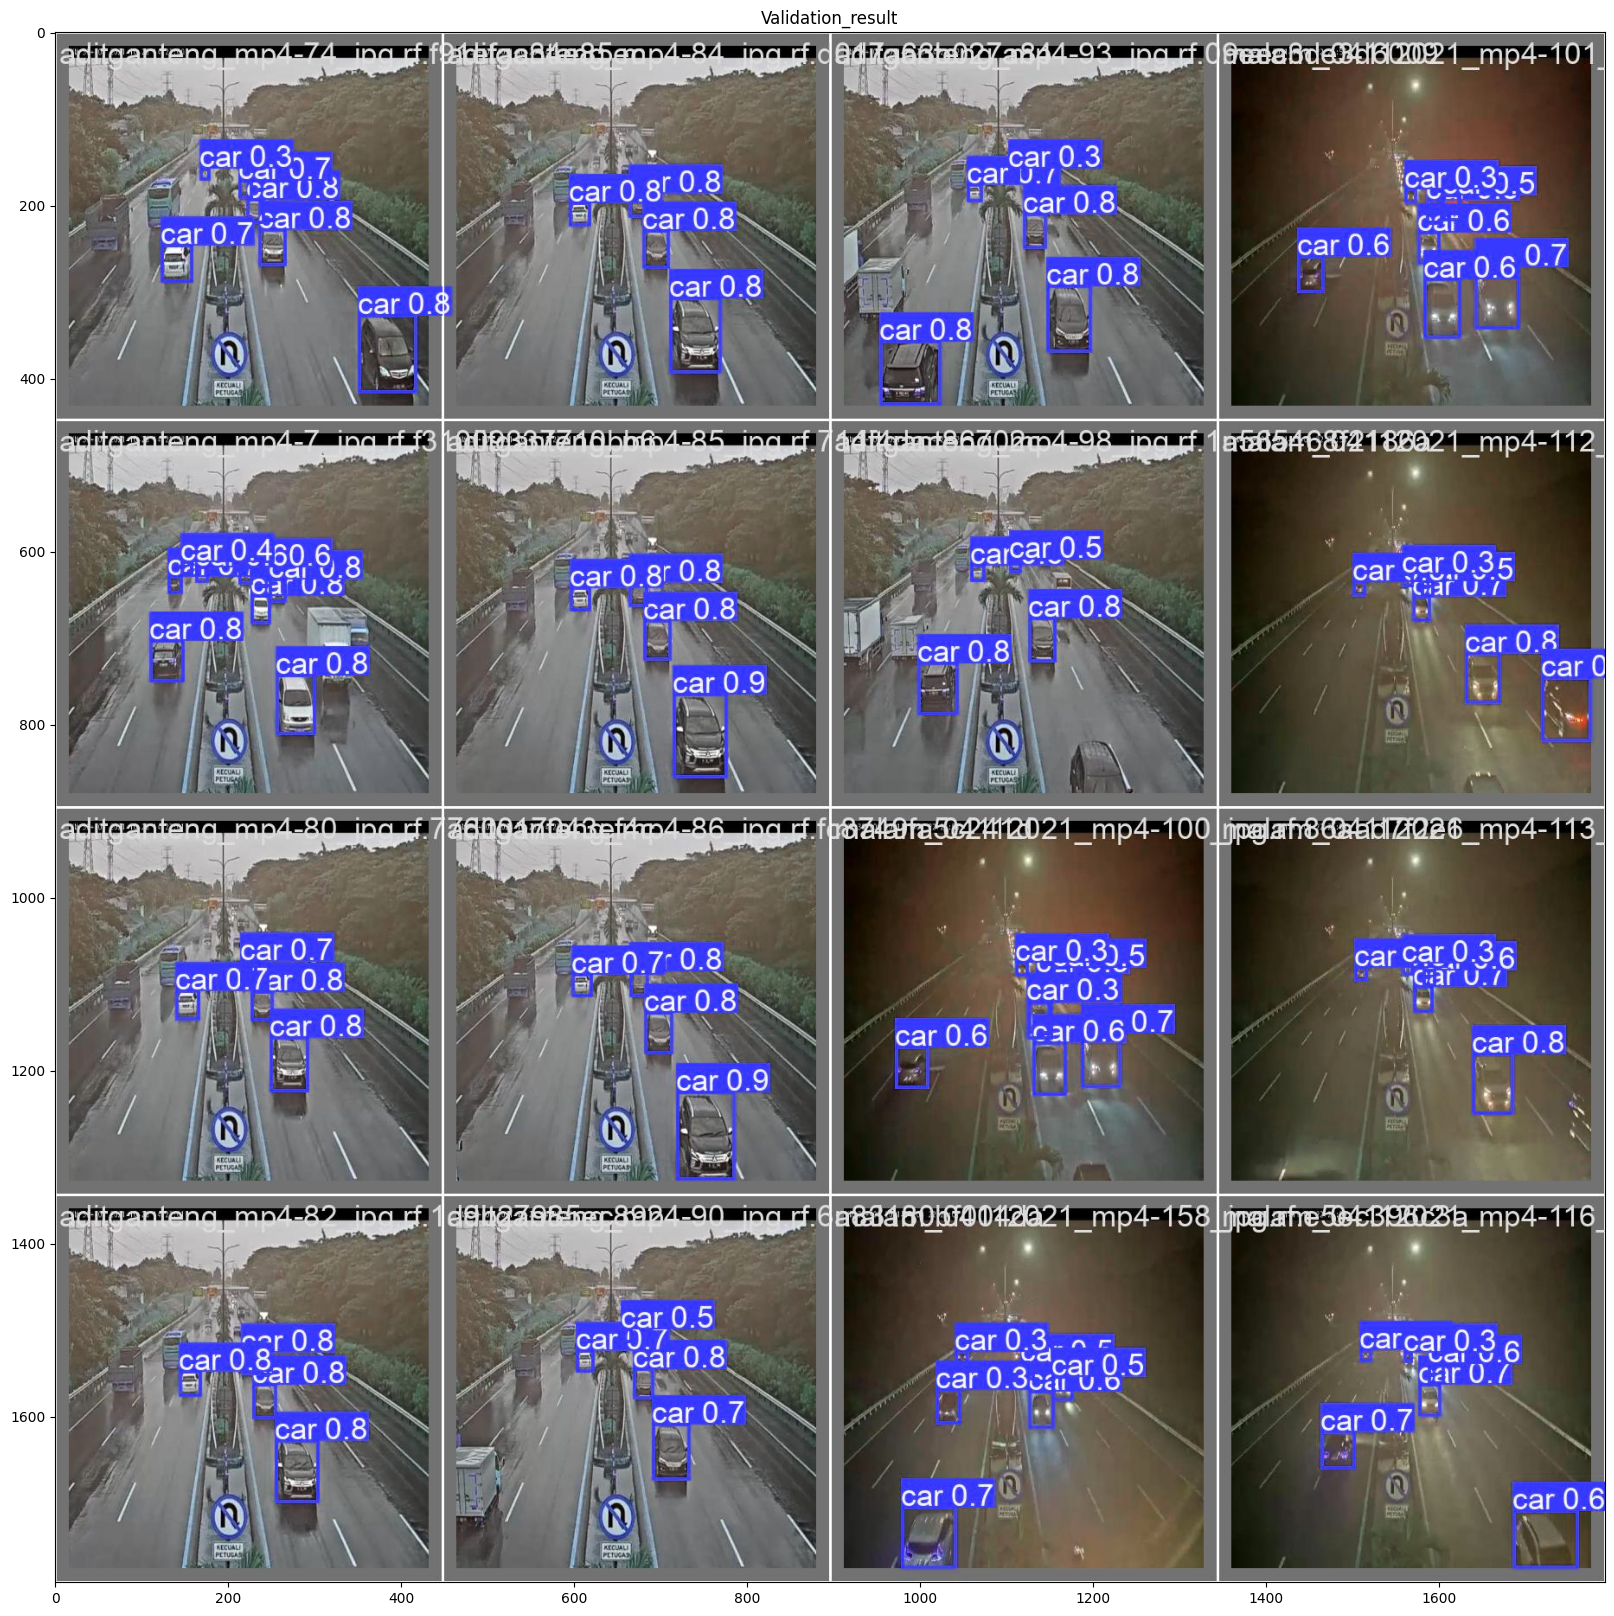

In [ ]:
display_results('/content/runs/detect/val/val_batch2_pred.jpg', "Validation_result")

# Testing the model on new data

In [ ]:
with tf.device('/device:GPU:0'):

  !yolo task = detect mode = predict model = /content/drive/MyDrive/runs/detect/train3/weights/best.pt conf = 0.50  source = /content/drive/MyDrive/car_detection-3/test/images

# Displaying predicted images on new data

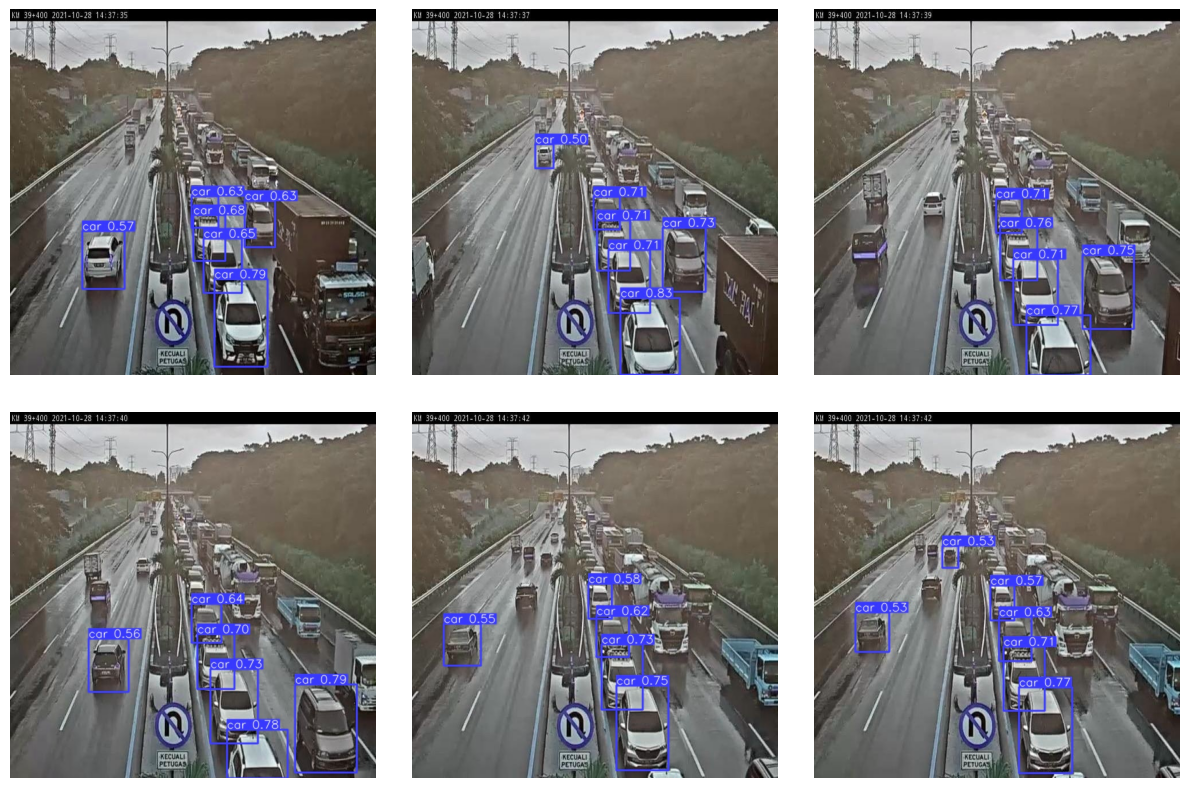

In [ ]:
img_array = images_of_vehicles('/content/drive/MyDrive/runs/detect/predict3')
display_vehicle(img_array)